Importing the dependencies


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head(4)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1


In [ ]:
data.shape

(20800, 5)

In [ ]:
data = data.drop(["title", "author","id"], axis = 1)

In [ ]:
data.head(5)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data.isnull().sum()

text     39
label     0
dtype: int64

In [ ]:
data1 = data.dropna()

In [ ]:
data1.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
data1 = data.sample(frac=1)
data1.reset_index(inplace=True)
data1.drop(["index"], axis=1, inplace=True)

In [ ]:
data1.isnull().sum()

text     39
label     0
dtype: int64

In [ ]:
data1 = data1.dropna()

In [ ]:
data1.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
data1['text']

0        Previous Oathkeepers to Prevent Voter Fraud- O...
1        On the eve of the major party conventions, vot...
2        Harvard Law School professor emeritus Alan Der...
3        Doug Casey: A Civil War Could Be in the Cards ...
4        0 \nThis is great news, everyone. It may have ...
                               ...                        
20795    Friday 18 November 2016 by Lucas Wilde Petitio...
20796    Email \nHillary Clinton swiped State Departmen...
20797    WASHINGTON  —     Donald J. Trump’s transition...
20798    George Michael, the   English songwriter who s...
20799    Donald J. Trump will become president of the U...
Name: text, Length: 20761, dtype: object

In [ ]:
data1['label']

0        1
1        0
2        0
3        1
4        1
        ..
20795    1
20796    1
20797    0
20798    0
20799    0
Name: label, Length: 20761, dtype: int64

<Axes: xlabel='label', ylabel='count'>

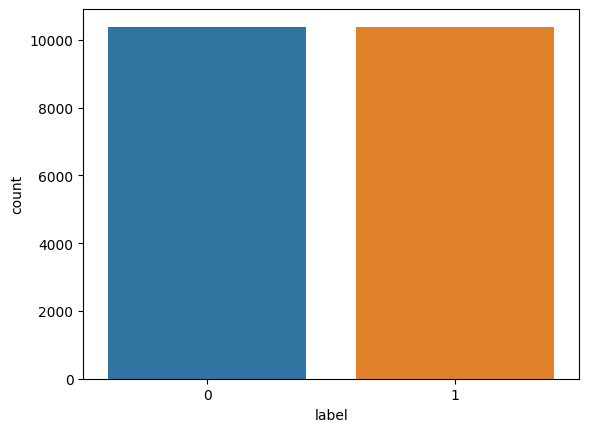

In [ ]:
# sns.countplot(data1['label'])
sns.countplot(data=data1,
              x='label',
              order=data1['label'].value_counts().index)

In [ ]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text_data):
	preprocessed_text = []
	
	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text


In [ ]:
preprocessed_review = preprocess_text(data1['text'].values)
data1['text'] = preprocessed_review

100%|██████████| 20761/20761 [21:43<00:00, 15.93it/s]


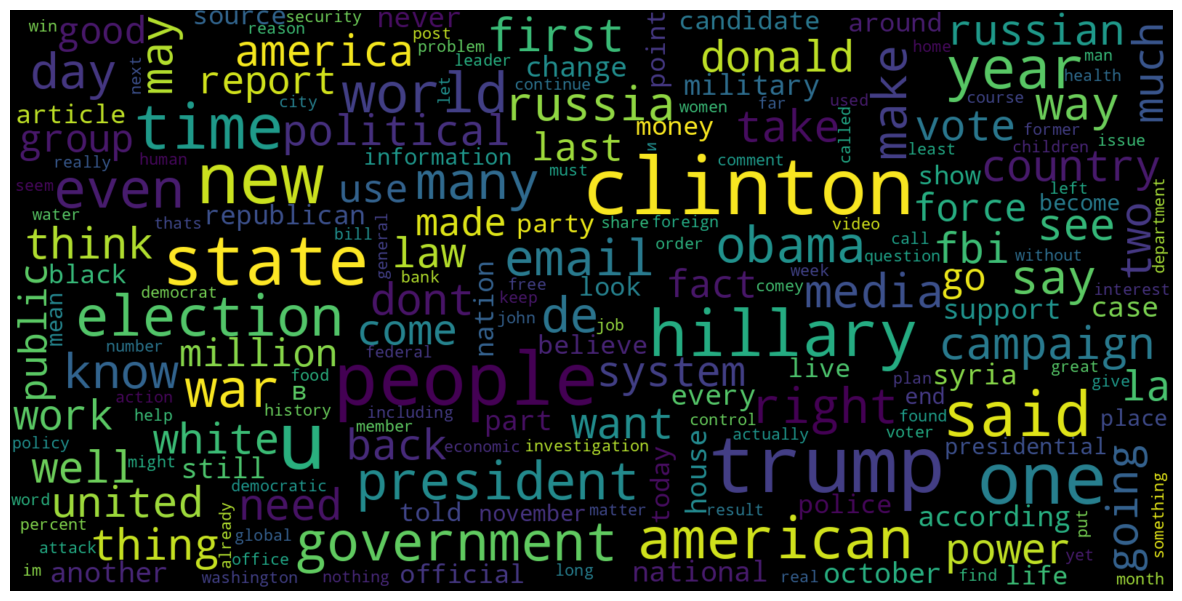

In [ ]:

# Real
consolidated = ' '.join(
    word for word in data1['text'][data1['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

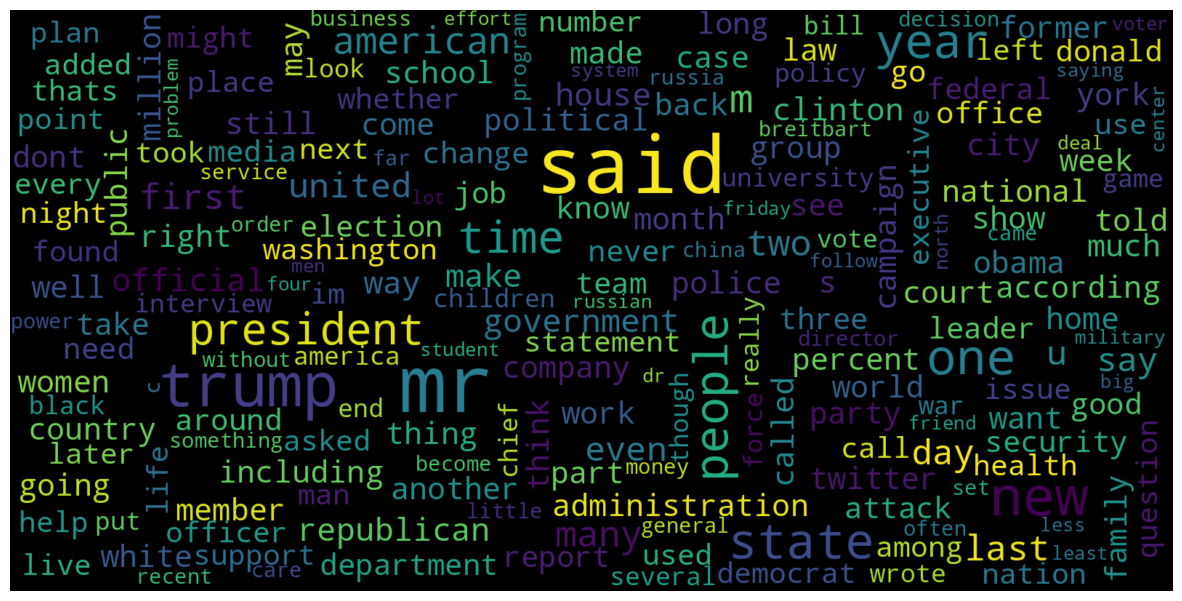

In [ ]:
# Fake
consolidated = ' '.join(
	word for word in data1['text'][data1['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

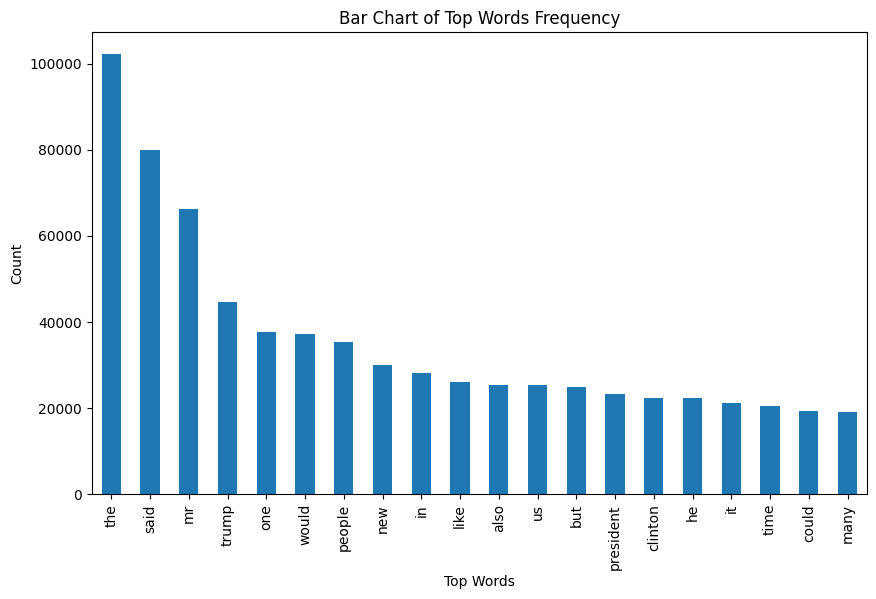

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
	vec = CountVectorizer().fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)
	return words_freq[:n]


common_words = get_top_n_words(data1['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data1['text'],
													data1['label'],
													test_size=0.25)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


0.9762363519588954
0.9537661336929301


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))


1.0
0.8944326719321903


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8834296724470135
0.839337314582932


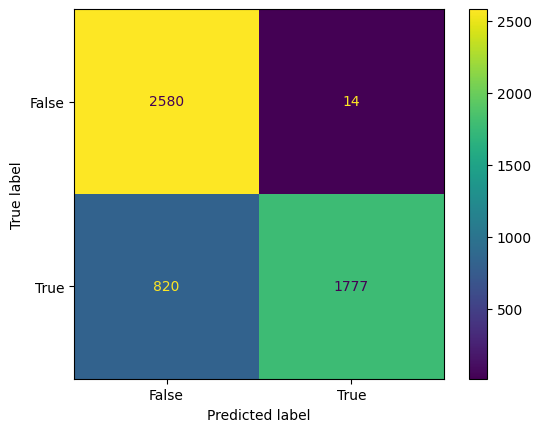

In [ ]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])


cm_display.plot()
plt.show()
